In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree 
df=pd.read_csv('C:/Users/PC/Downloads/pandas notebooks/Data sets/data.csv')
df

,ID,Age,Income,Gender,Marital_Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [19]:
inputs=df.drop('Buys',axis='columns')
target=df['Buys']

In [14]:
from sklearn.preprocessing import LabelEncoder

In [22]:
inputs['ID_n']=LabelEncoder().fit_transform(inputs['ID'])
inputs['Age_n']=LabelEncoder().fit_transform(inputs['Age'])
inputs['Income_n']=LabelEncoder().fit_transform(inputs['Income'])
inputs['Gender_n']=LabelEncoder().fit_transform(inputs['Gender'])
inputs['Marital_Status_n']=LabelEncoder().fit_transform(inputs['Marital_Status'])
#inputs['ID_n']=LabelEncoder().fit_transform(inputs['ID'])

In [23]:
inputs

,ID,Age,Income,Gender,Marital_Status,ID_n,Age_n,Income_n,Gender_n,Marital_Status_n
0,1,<21,High,Male,Single,0,1,0,1,1
1,2,<21,High,Male,Married,1,1,0,1,0
2,3,21-35,High,Male,Single,2,0,0,1,1
3,4,>35,Medium,Male,Single,3,2,2,1,1
4,5,>35,Low,Female,Single,4,2,1,0,1
5,6,>35,Low,Female,Married,5,2,1,0,0
6,7,21-35,Low,Female,Married,6,0,1,0,0
7,8,<21,Medium,Male,Single,7,1,2,1,1
8,9,<21,Low,Female,Married,8,1,1,0,0
9,10,>35,Medium,Female,Single,9,2,2,0,1


In [27]:
inputs_n=inputs.drop(['ID','Age','Income','Gender','Marital_Status'],axis='columns')
inputs_n

,ID_n,Age_n,Income_n,Gender_n,Marital_Status_n
0,0,1,0,1,1
1,1,1,0,1,0
2,2,0,0,1,1
3,3,2,2,1,1
4,4,2,1,0,1
5,5,2,1,0,0
6,6,0,1,0,0
7,7,1,2,1,1
8,8,1,1,0,0
9,9,2,2,0,1


In [25]:
from sklearn import tree

In [26]:
model=tree.DecisionTreeClassifier()

In [28]:
model.fit(inputs_n,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
model.score(inputs_n,target)

1.0

In [30]:
model.predict([[0,1,0,1,1]])

array(['No'], dtype=object)

In [31]:
clf=model.fit(inputs_n,target)

[Text(418.5, 498.3, 'X[0] <= 1.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(279.0, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(558.0, 407.70000000000005, 'X[0] <= 12.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(418.5, 317.1, 'X[0] <= 7.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(279.0, 226.5, 'X[0] <= 4.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(139.5, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(418.5, 135.89999999999998, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(279.0, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(558.0, 45.299999999999955, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(558.0, 226.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(697.5, 317.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

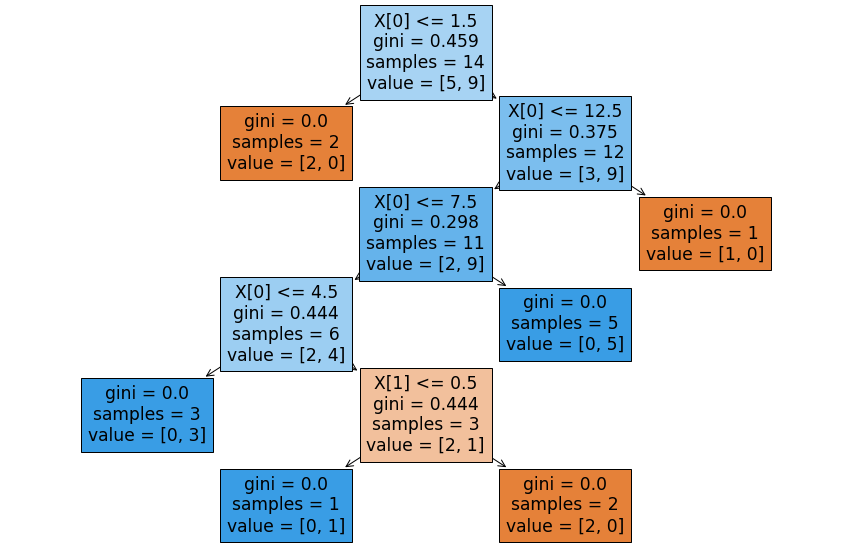

In [39]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)